## Análise comparativa dos efeitos de agentes limpantes no crescimento de microorganismos presentes em superfícies de smartphones

Este notebook contem diferentes gráficos que nos ajudaram na análise dos dados obtidos no trabalho, a partir dos resultados presentes no excel : 'https://docs.google.com/spreadsheets/d/1Rto3JECVlTNWfXliWYdldlO4ZsrzfFDMOtEV-PvyESQ/edit#gid=0', sobre os agentes limpantes conforme os dias e o logaritmo da área das colônias na base 10

Primeiro, extraimos os dados do excel em uma tabela pandas

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_excel(r"C:\Users\ferna\Documents\2022.1\becn\becn.xlsx",index_col=0,na_filter=False)
data

,Álcool 70º,Limpa Tela,Manga do Moletom,Sujeira do Aparelho,Unnamed: 5
Dia,,,,,
0,0,0.000000,0.000000,0.000000,
1,0,0.000000,1.396621,0.593364,
2,0,0.809314,1.494655,0.670602,
3,0,1.032101,1.649036,1.414482,


Em seguida, fizemos um gráfico de linhas com os dados a partir da tabela, sendo eixo x os dias e eixo y, logaritmo da área das colônias na base 10 que neste notebook chamaremos de 'área' para simplificarmos nos eixos

Text(0.5, 1.0, 'Gráfico Dia x Área')

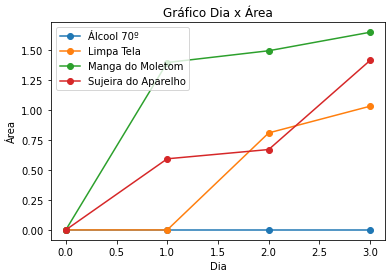

In [128]:
data.plot(marker='o')
plt.ylabel('Área')
plt.title('Gráfico Dia x Área')

O próximo gráfico é um boxplot para o cresciemnto das colônias a titulo de comparação entre os dados medidos e para enxergar visualmente a variação e discrepância de valores

<AxesSubplot:>

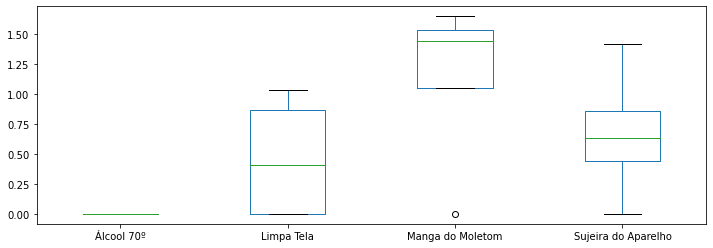

In [32]:
data.plot.box(figsize=(12,4))

Os  gráficos a seguir foram usados para analisar visualmente o crescimento de colônias pelos dias e compará-lo entre agentes limpantes.

Text(0, 0.5, 'Área')

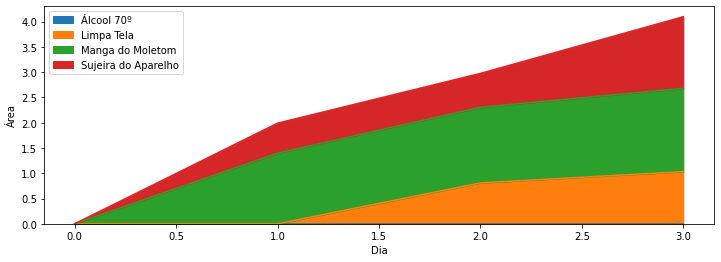

In [138]:
a=data.plot.area(figsize=(12,4))
plt.ylabel('Área')

Text(0, 0.5, 'Área')

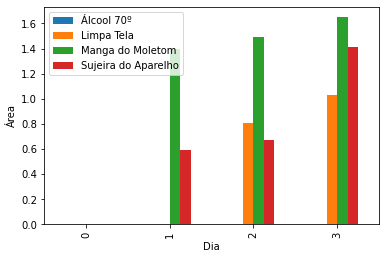

In [131]:
data.plot.bar()
plt.ylabel('Área')

Os próximos gráficos analisam a relação entre o aumento da área das colônias dos três agentes limpantes em função da sujeira do aparelho 

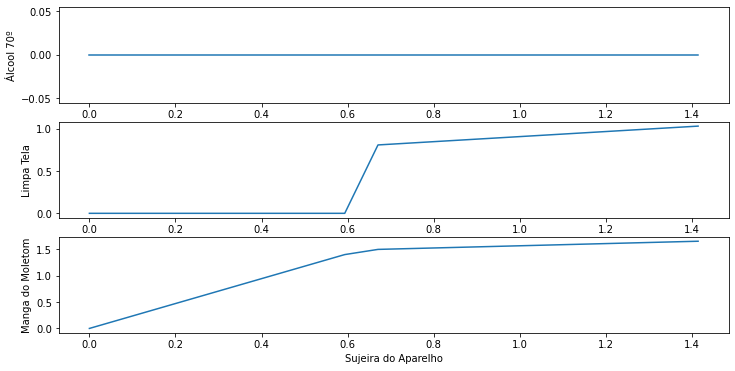

In [56]:
fig,axs= plt.subplots(3,figsize=(12,6))
axs[0].plot(data['Sujeira do Aparelho'],data['Álcool 70º'])
axs[0].set(ylabel='Álcool 70º')
axs[1].plot(data['Sujeira do Aparelho'],data['Limpa Tela'])
axs[1].set(ylabel='Limpa Tela')
axs[2].plot(data['Sujeira do Aparelho'],data['Manga do Moletom'])
axs[2].set(ylabel='Manga do Moletom')
for ax in axs.flat:
    ax.set(xlabel='Sujeira do Aparelho')

Os gráficos a seguir medem individualmente a progressão da área das colônias ao passar dos dias, sendo possível notar a estagnação do alcóol e o alto número da manga de moletom logo após o dia 1.

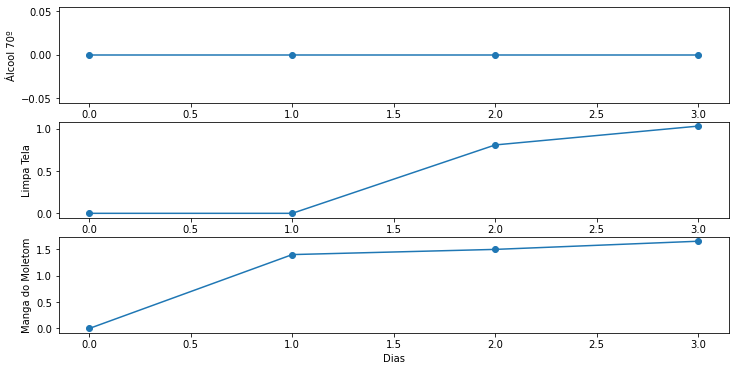

In [127]:
fig,axs= plt.subplots(3,figsize=(12,6))
axs[0].plot(data['Álcool 70º'],marker='o')
axs[0].set(ylabel='Álcool 70º')
axs[1].plot(data['Limpa Tela'], marker='o')
axs[1].set(ylabel='Limpa Tela')
axs[2].plot(data['Manga do Moletom'], marker='o')
axs[2].set(ylabel='Manga do Moletom')
for ax in axs.flat:
    ax.set(xlabel='Dias')

Os próximos gráficos calculam indivdualmente as correlações dos agentes limpantes com asujeira do aparelho.

A correlação do alcóol com a sujeira do aparelho é 0, como visto nos cantos superior direito e inferior esquerdo, uma vez que mesmo quando a área na sujeira do aparelho cresce, a do ácool permanece 0, como vimos nos gráficos anteriores. 

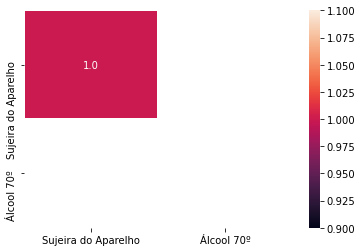

In [71]:
l=data.drop(columns=['Manga do Moletom','Limpa Tela'])
l=l[['Sujeira do Aparelho','Álcool 70º']]
correlation=l.corr()
plot=sns.heatmap(correlation,annot= True, fmt='.1f',linewidths=.6)
plt.show()

Entre a manga do moletom e a sujeira já nota-se uma correlaçõ positiva, onde quando a área da sujeira do aparelho aumenta, a da manfa aumenta tambem.

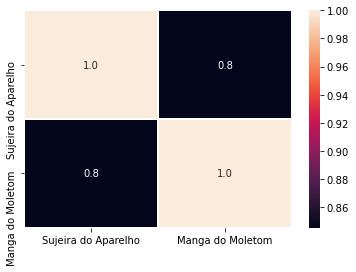

In [134]:
m=data.drop(columns=['Álcool 70º','Limpa Tela'])
m=m[['Sujeira do Aparelho','Manga do Moletom']]
correlation=m.corr()
plot=sns.heatmap(correlation,annot= True, fmt='.1f',linewidths=.6)
plt.show()

Entre o limpa telas e a sujeira já nota-se uma correlaçõ positiva, onde quando a área da sujeira do aparelho aumenta, a do produto aumenta tambem.

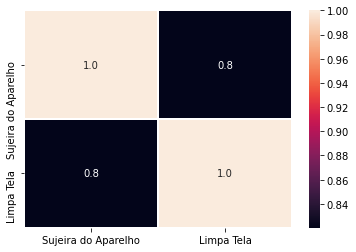

In [74]:
t=data.drop(columns=['Álcool 70º','Manga do Moletom'])
t=t[['Sujeira do Aparelho','Limpa Tela']]
correlation=t.corr()
plot=sns.heatmap(correlation,annot= True, fmt='.1f',linewidths=.6)
plt.show()

A seguir obtivemos a correlação geral entre todos os desinfetantes e a sujeira do aparelho. Nota-se a falta de correlação entre alcool e os outros agentes, uma vez que não obteve crescimento algum de microorganismos. Também podemos notar uma correlação positiva entre o crescimento dos microrganismos com a utilização do limpa telas e da blusa da manga como agentes limpas, sendo que a partir dos dados obtidos e dos gráficos feitos, notamos que o álcool 70° foi o método que mostrou melhores resultados como agente limpante de celulares em relação os microorganismos.

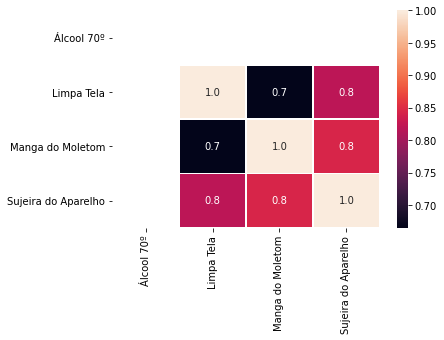

In [75]:
correlation=data.corr()
plot=sns.heatmap(correlation,annot= True, fmt='.1f',linewidths=.6)
plt.show()

A seguir fizemos gráficos interativos para serem de melhor visualização na apresentação

In [136]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [137]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

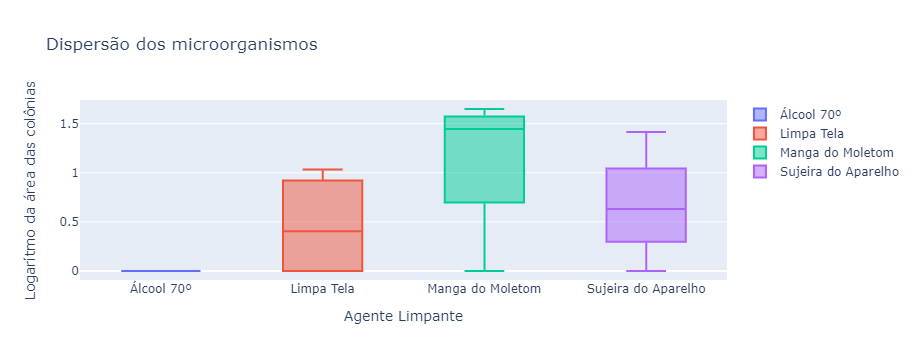

In [101]:
trace1 = go.Box(y = data['Álcool 70º'], name = 'Álcool 70º')
trace2 = go.Box(y = data['Limpa Tela'], name = 'Limpa Tela')
trace3 = go.Box(y = data['Manga do Moletom'], name = 'Manga do Moletom')
trace4 = go.Box(y = data['Sujeira do Aparelho'], name = 'Sujeira do Aparelho')
ai=[trace1,trace2,trace3,trace4]
layout = go.Layout(title='Dispersão dos microorganismos', 
                   xaxis={'title': 'Agente Limpante'},
                   yaxis={'title': 'Logarítmo da área das colônias'})
fig=go.Figure(data=ai,layout=layout)
py.iplot(fig)

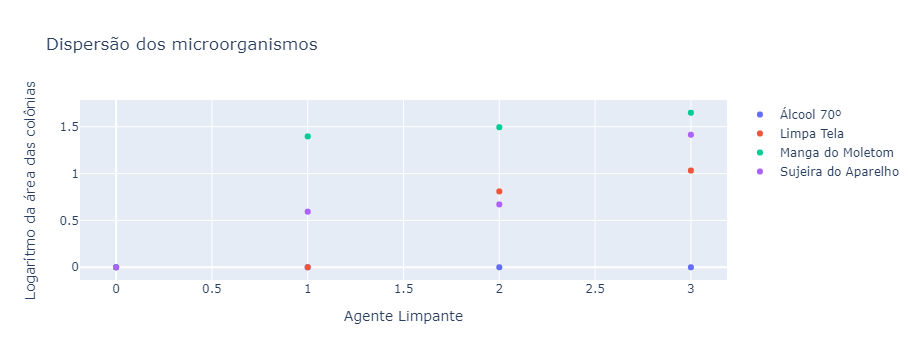

In [102]:
trace1 = go.Scatter(y = data['Álcool 70º'], mode='markers',name = 'Álcool 70º')
trace2 = go.Scatter(y = data['Limpa Tela'], mode='markers', name = 'Limpa Tela')
trace3 = go.Scatter(y = data['Manga do Moletom'], mode= 'markers', name = 'Manga do Moletom')
trace4 = go.Scatter(y = data['Sujeira do Aparelho'], mode= 'markers', name = 'Sujeira do Aparelho')
ai=[trace1,trace2,trace3,trace4]
layout = go.Layout(title='Dispersão dos microorganismos', 
                   xaxis={'title': 'Agente Limpante'},
                   yaxis={'title': 'Logarítmo da área das colônias'})
fig=go.Figure(data=ai,layout=layout)
py.iplot(fig)